In [1]:
import sys
sys.path.insert(0, "/data/hpcdata/users/anddon76/icenet/icenet-experimental")
sys.path.insert(0, "/data/hpcdata/users/anddon76/icenet/icenet")
sys.path.insert(0, "/data/hpcdata/users/anddon76/icenet/icenet-experimental/backbone-v2")
import os
os.chdir("/data/hpcdata/users/anddon76/icenet/icenet-experimental/")
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

## 1. Explore

In [2]:
amsr = xr.open_dataset("/data/twins/wip/common/sic/amsr2/south/asi-AMSR2-s6250-20191215-v5.4.nc")
amsr

/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:              (x: 1264, y: 1328)
Coordinates:
  * x                    (x) float64 -3.947e+06 -3.941e+06 ... 3.947e+06
  * y                    (y) float64 -3.947e+06 -3.941e+06 ... 4.347e+06
Data variables:
    polar_stereographic  |S1 ...
    z                    (y, x) float32 ...
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Dec 16 05:34:22 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

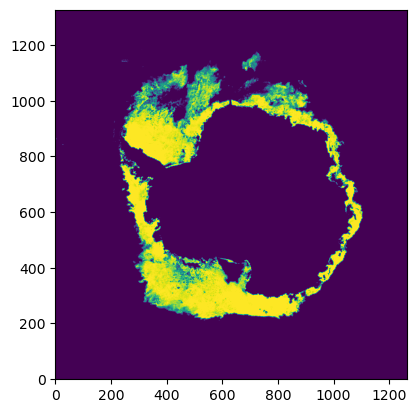

In [3]:
img = amsr.z.to_numpy()
img = np.where(np.isnan(img), 0, img)
plt.imshow(img, origin="lower")

In [5]:
osisaf = xr.open_dataset("/data/hpcdata/users/anddon76/icenet/icenet-experimental/data/osisaf/south/siconca/2019.nc")
osisaf

<xarray.Dataset>
Dimensions:   (xc: 432, yc: 432, time: 365)
Coordinates:
  * xc        (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc        (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
  * time      (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
    lon       (yc, xc) float32 ...
    lat       (yc, xc) float32 ...
Data variables:
    ice_conc  (time, yc, xc) float64 ...

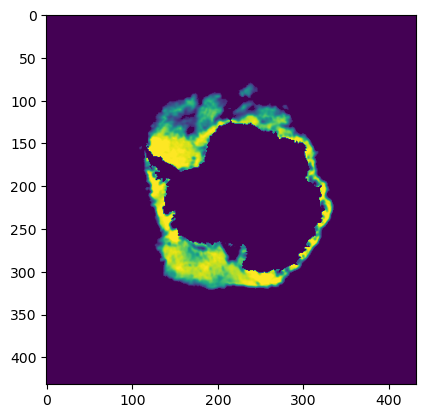

In [6]:
img_osisaf = osisaf.sel(time=pd.to_datetime("2019-12-15")).ice_conc
plt.imshow(img_osisaf)

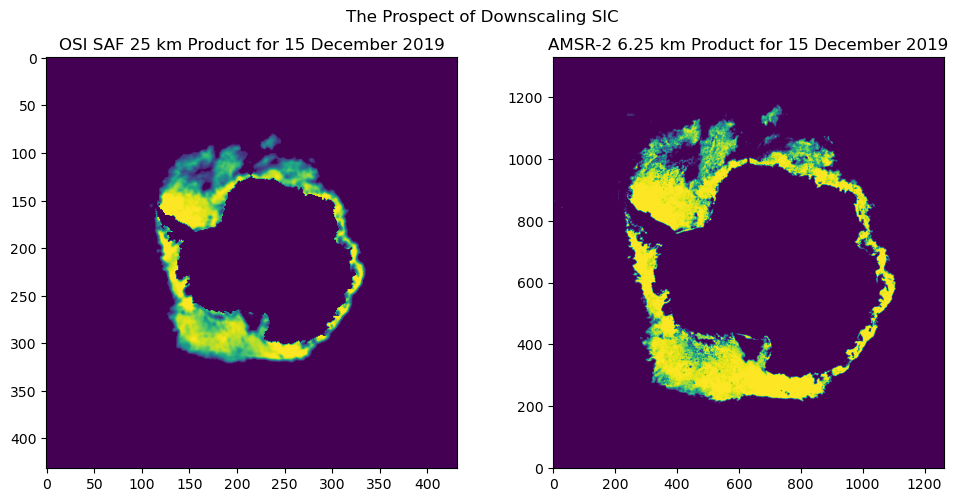

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_osisaf)
ax[0].set_title("OSI SAF 25 km Product for 15 December 2019")
ax[1].imshow(img, origin="lower")
ax[1].set_title("AMSR-2 6.25 km Product for 15 December 2019")
plt.suptitle("The Prospect of Downscaling SIC")
plt.tight_layout()
plt.show()

## 2. Rothera Dataset Creation

In [75]:
amsr

<xarray.Dataset>
Dimensions:              (x: 1264, y: 1328)
Coordinates:
  * x                    (x) float64 -3.947e+06 -3.941e+06 ... 3.947e+06
  * y                    (y) float64 -3.947e+06 -3.941e+06 ... 4.347e+06
Data variables:
    polar_stereographic  |S1 ...
    z                    (y, x) float32 ...
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Dec 16 05:34:22 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

In [76]:
amsr.z.shape

(1328, 1264)

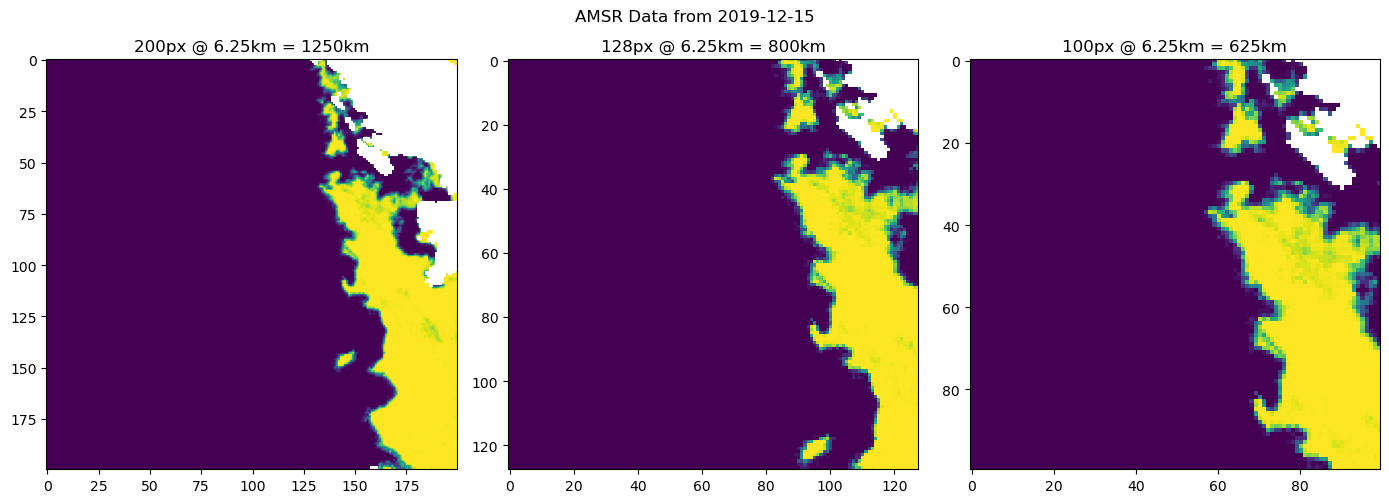

In [86]:
large = amsr.z[::-1][500:700, 100:300]
med = amsr.z[::-1][525:653, 150:278]
small = amsr.z[::-1][525:625, 175:275]
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
ax[0].imshow(large)
ax[0].set_title("200px @ 6.25km = 1250km")
ax[1].imshow(med)
ax[1].set_title("128px @ 6.25km = 800km")
ax[2].imshow(small)
ax[2].set_title("100px @ 6.25km = 625km")
plt.suptitle("AMSR Data from 2019-12-15")
plt.tight_layout()


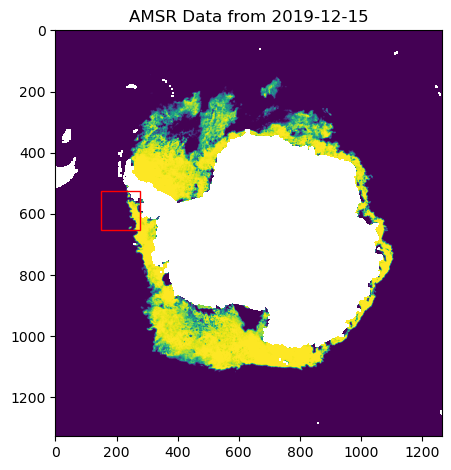

In [5]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
ax.imshow(amsr.z[::-1])
# r_large = Rectangle((100, 500), 200, 200, edgecolor="red", facecolor=(0, 0, 0, 0))
r_med = Rectangle((150, 525), 128, 128, edgecolor="red", facecolor=(0, 0, 0, 0))
# r_small = Rectangle((175, 525), 100, 100, edgecolor="red", facecolor=(0, 0, 0, 0))
# ax.add_patch(r_large)
ax.add_patch(r_med)
# ax.add_patch(r_small)
plt.title("AMSR Data from 2019-12-15")
plt.tight_layout()

In [16]:
from matplotlib.animation import FuncAnimation
import os

def update(f):
    with xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f}") as temp:
        ax.imshow(temp.z[::-1][525:625, 175:275], animated=True)
        ax.set_title(f"AMSR {f} @ Rothera")
    print(f)

fnames = [f for f in os.listdir("/data/twins/wip/common/sic/amsr2/south/") if "2019" in f]
fps = 10
fig, ax = plt.subplots(figsize=(6, 6))
with xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{fnames[0]}") as temp:
    ax.imshow(temp.z[::-1], animated=True)
    ax.set_title(f"AMSR {fnames[0]} @ Rothera")

animation = FuncAnimation(fig, update, fnames, interval=1000 / fps)
plt.close()
title = f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/results/amsr_rothera_100px_2019.mp4"
animation.save(title, fps=fps)

asi-AMSR2-s6250-20190101-v5.4.nc
asi-AMSR2-s6250-20190101-v5.4.nc
asi-AMSR2-s6250-20190102-v5.4.nc
asi-AMSR2-s6250-20190103-v5.4.nc
asi-AMSR2-s6250-20190104-v5.4.nc
asi-AMSR2-s6250-20190105-v5.4.nc
asi-AMSR2-s6250-20190106-v5.4.nc
asi-AMSR2-s6250-20190107-v5.4.nc
asi-AMSR2-s6250-20190108-v5.4.nc
asi-AMSR2-s6250-20190109-v5.4.nc
asi-AMSR2-s6250-20190110-v5.4.nc
asi-AMSR2-s6250-20190111-v5.4.nc
asi-AMSR2-s6250-20190112-v5.4.nc
asi-AMSR2-s6250-20190113-v5.4.nc
asi-AMSR2-s6250-20190114-v5.4.nc
asi-AMSR2-s6250-20190115-v5.4.nc
asi-AMSR2-s6250-20190116-v5.4.nc
asi-AMSR2-s6250-20190117-v5.4.nc
asi-AMSR2-s6250-20190118-v5.4.nc
asi-AMSR2-s6250-20190119-v5.4.nc
asi-AMSR2-s6250-20190120-v5.4.nc
asi-AMSR2-s6250-20190121-v5.4.nc
asi-AMSR2-s6250-20190122-v5.4.nc
asi-AMSR2-s6250-20190123-v5.4.nc
asi-AMSR2-s6250-20190124-v5.4.nc
asi-AMSR2-s6250-20190125-v5.4.nc
asi-AMSR2-s6250-20190126-v5.4.nc
asi-AMSR2-s6250-20190127-v5.4.nc
asi-AMSR2-s6250-20190128-v5.4.nc
asi-AMSR2-s6250-20190129-v5.4.nc
asi-AMSR2-

In [16]:
fnames = [f for f in os.listdir("/data/twins/wip/common/sic/amsr2/south/") if "201901" in f]
pd.to_datetime(fnames[-1].split("-")[3]).dayofyear

31

/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


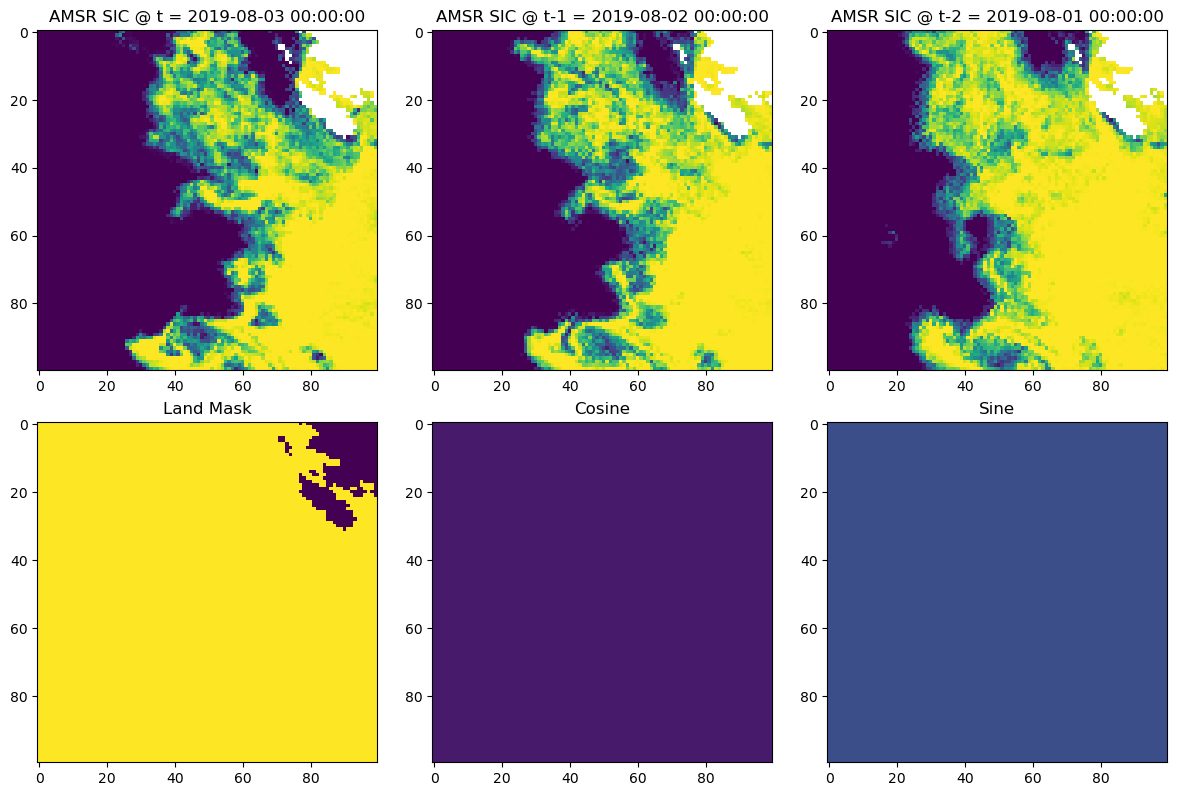

In [18]:
# demo data preprocessing
fnames = sorted([f for f in os.listdir("/data/twins/wip/common/sic/amsr2/south/") if "201908" in f])
for f_t_2 in fnames[:-2]:  # stop such that we have two days ahead
    with xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t_2}") as temp_t_2:
        date_t_2 = pd.to_datetime(f_t_2.split("-")[3])
        date_t_1 = date_t_2 + pd.Timedelta(1, "D")
        f_t_1 = f"asi-AMSR2-s6250-{date_t_1.strftime('%Y%m%d')}-v5.4.nc"
        with xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t_1}") as temp_t_1:
            date_t = date_t_1 + pd.Timedelta(1, "D")
            f_t = f"asi-AMSR2-s6250-{date_t.strftime('%Y%m%d')}-v5.4.nc"
            with xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t}") as temp_t:
                ice_t = temp_t.z[::-1][525:625, 175:275]
                ice_t_1 = temp_t_1.z[::-1][525:625, 175:275]
                ice_t_2 = temp_t_2.z[::-1][525:625, 175:275]
                land = np.where(np.isnan(ice_t), 0, 1)
                cos = np.ones_like(ice_t) * np.cos(2 * np.pi * date_t.dayofyear / 366)
                sin = np.ones_like(ice_t) * np.sin(2 * np.pi * date_t.dayofyear / 366)
                fig, ax = plt.subplots(2, 3, figsize=(12, 8))
                ax = ax.ravel()
                ax[0].imshow(ice_t)
                ax[0].set_title(f"AMSR SIC @ t = {date_t}")
                ax[1].imshow(ice_t_1)
                ax[1].set_title(f"AMSR SIC @ t-1 = {date_t_1}")
                ax[2].imshow(ice_t_2)
                ax[2].set_title(f"AMSR SIC @ t-2 = {date_t_2}")
                ax[3].imshow(land)
                ax[3].set_title(f"Land Mask")
                ax[4].imshow(cos, vmin=-1, vmax=1)
                ax[4].set_title(f"Cosine")
                ax[5].imshow(sin, vmin=-1, vmax=1)
                ax[5].set_title(f"Sine")
                plt.tight_layout()
                plt.show()
                break
            # fig, ax = plt.subplots(1, 3,)

        # with xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f}") as temp_t_minus_two:
        #  ice = temp.z[::-1][525:625, 175:275]
        #  break

In [19]:
# computing climatology
climatology = []
years = list(range(2013, 2020))
date = pd.to_datetime("2013-01-01")
for doy in tqdm(range(365)):
    sic = []
    for year in years:
        f = f"asi-AMSR2-s6250-{year}{date.month:02d}{date.day:02d}-v5.4.nc"
        if os.path.exists(f"/data/twins/wip/common/sic/amsr2/south/{f}"):
            with xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f}") as temp:
                sic.append(temp.z[::-1][525:653, 150:278])
    avg = np.array(sic).mean(axis=0)
    climatology.append(avg)
    # plt.imshow(avg)
    # plt.title(f"Mean SIC for {date.strftime('%m%d')}")
    # break
    date = date + pd.Timedelta(1, "D")
climatology = np.array(climatology)


  0%|          | 0/365 [00:00<?, ?it/s]

 13%|█▎        | 47/365 [00:10<01:12,  4.40it/s]


KeyboardInterrupt: 

In [ ]:
from matplotlib.animation import FuncAnimation
import os

def update(step):
    ax.imshow(climatology[step], animated=True)
    date = pd.to_datetime("2013-01-01") + pd.Timedelta(step + 1, "D")
    ax.set_title(f"AMSR Climatology @ Rothera\nXXXX-{date.month}-{date.day}")
    print(step)

fps = 10
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(climatology[0], animated=True)
ax.set_title(f"AMSR Climatology @ Rothera\nXXXX-01-01")

animation = FuncAnimation(fig, update, range(365), interval=1000 / fps)
plt.close()
title = f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/results/amsr_rothera_100px_climatology.mp4"
animation.save(title, fps=fps)

In [89]:
np.save("/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera_climatology.npy", climatology)

Text(0.5, 1.0, 'AMSR SIC Climatology @ 2019-08-03 00:00:00')

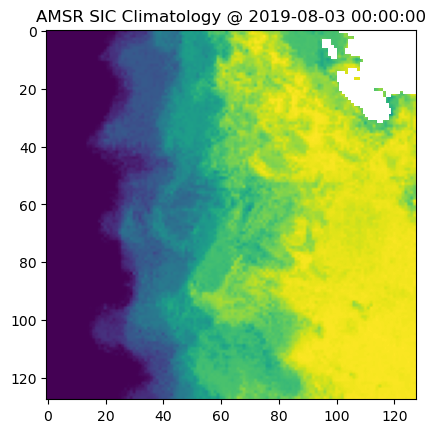

In [20]:
climatology = np.load("/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera_climatology.npy")
doy = date_t.dayofyear
plt.imshow(climatology[doy])
plt.title(f"AMSR SIC Climatology @ {date_t}")

In [21]:
ice_t_2.max()

<xarray.DataArray 'z' ()>
array(100.)

In [ ]:
# produce actual dataset
# demo data preprocessing
fnames = sorted([f for f in os.listdir("/data/twins/wip/common/sic/amsr2/south/")])
for f_t_2 in tqdm(fnames[:-2]):  # stop such that we have two days ahead
    try:
        temp_t_2 = xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t_2}")
        date_t_2 = pd.to_datetime(f_t_2.split("-")[3])
        date_t_1 = date_t_2 + pd.Timedelta(1, "D")
        f_t_1 = f"asi-AMSR2-s6250-{date_t_1.strftime('%Y%m%d')}-v5.4.nc"
        temp_t_1 =  xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t_1}")
        date_t = date_t_1 + pd.Timedelta(1, "D")
        f_t = f"asi-AMSR2-s6250-{date_t.strftime('%Y%m%d')}-v5.4.nc"
        temp_t = xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t}")
        ice_t = temp_t.z[::-1][525:653, 150:278] / 100  # convert 0-100 to 0-1
        ice_t_1 = temp_t_1.z[::-1][525:653, 150:278] / 100  # convert 0-100 to 0-1
        ice_t_2 = temp_t_2.z[::-1][525:653, 150:278] / 100 # convert 0-100 to 0-1
        clim = climatology[date_t.dayofyear % 365] / 100  # if leap year, just wrap around, also convert 0-100 to 0-1
        land = np.where(np.isnan(ice_t), 0, 1)  # make sea == 1 and land == 0 for network activation
        cos = np.ones_like(ice_t) * np.cos(2 * np.pi * date_t.dayofyear / 366)
        sin = np.ones_like(ice_t) * np.sin(2 * np.pi * date_t.dayofyear / 366)
        sample = np.array([ice_t, ice_t_1, ice_t_2, clim, land, cos, sin])
        np.save(f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera/{date_t.strftime('%Y%m%d')}", sample)
    except:
        print(f"Skipping {f_t_2}")

  0%|          | 0/3834 [00:00<?, ?it/s]

  3%|▎         | 132/3834 [00:03<01:58, 31.26it/s]

Skipping asi-AMSR2-s6250-20130509-v5.4.nc
Skipping asi-AMSR2-s6250-20130510-v5.4.nc


 60%|█████▉    | 2297/3834 [01:17<01:40, 15.32it/s]

Skipping asi-AMSR2-s6250-20190417-v5.4.nc
Skipping asi-AMSR2-s6250-20190418-v5.4.nc


 64%|██████▍   | 2446/3834 [01:23<00:44, 31.37it/s]

Skipping asi-AMSR2-s6250-20190912-v5.4.nc
Skipping asi-AMSR2-s6250-20190913-v5.4.nc


 72%|███████▏  | 2751/3834 [01:39<00:35, 30.40it/s]

Skipping asi-AMSR2-s6250-20200716-v5.4.nc
Skipping asi-AMSR2-s6250-20200717-v5.4.nc


 86%|████████▋ | 3310/3834 [02:05<00:35, 14.75it/s]

Skipping asi-AMSR2-s6250-20220130-v5.4.nc
Skipping asi-AMSR2-s6250-20220131-v5.4.nc


 87%|████████▋ | 3334/3834 [02:07<00:36, 13.58it/s]

Skipping asi-AMSR2-s6250-20220227-v5.4.nc
Skipping asi-AMSR2-s6250-20220228-v5.4.nc


 88%|████████▊ | 3371/3834 [02:09<00:16, 28.02it/s]

Skipping asi-AMSR2-s6250-20221230-v5.4.nc
Skipping asi-AMSR2-s6250-20221231-v5.4.nc


 88%|████████▊ | 3391/3834 [02:09<00:11, 39.72it/s]

Skipping asi-AMSR2-s6250-20230130-v5.4.nc
Skipping asi-AMSR2-s6250-20230131-v5.4.nc


 89%|████████▉ | 3405/3834 [02:10<00:16, 25.97it/s]

Skipping asi-AMSR2-s6250-20230417-v5.4.nc
Skipping asi-AMSR2-s6250-20230418-v5.4.nc
Skipping asi-AMSR2-s6250-20230429-v5.4.nc
Skipping asi-AMSR2-s6250-20230430-v5.4.nc


 89%|████████▉ | 3409/3834 [02:10<00:21, 19.32it/s]

Skipping asi-AMSR2-s6250-20230530-v5.4.nc
Skipping asi-AMSR2-s6250-20230531-v5.4.nc


 89%|████████▉ | 3415/3834 [02:11<00:21, 19.74it/s]

Skipping asi-AMSR2-s6250-20230606-v5.4.nc
Skipping asi-AMSR2-s6250-20230607-v5.4.nc


 90%|████████▉ | 3437/3834 [02:12<00:17, 22.28it/s]

Skipping asi-AMSR2-s6250-20230628-v5.4.nc
Skipping asi-AMSR2-s6250-20230629-v5.4.nc
Skipping asi-AMSR2-s6250-20230705-v5.4.nc
Skipping asi-AMSR2-s6250-20230706-v5.4.nc


 90%|████████▉ | 3446/3834 [02:12<00:13, 29.31it/s]

Skipping asi-AMSR2-s6250-20230709-v5.4.nc
Skipping asi-AMSR2-s6250-20230710-v5.4.nc


 90%|█████████ | 3457/3834 [02:13<00:14, 25.29it/s]

Skipping asi-AMSR2-s6250-20230725-v5.4.nc
Skipping asi-AMSR2-s6250-20230726-v5.4.nc
Skipping asi-AMSR2-s6250-20230801-v5.4.nc
Skipping asi-AMSR2-s6250-20230802-v5.4.nc


 90%|█████████ | 3467/3834 [02:13<00:12, 29.63it/s]

Skipping asi-AMSR2-s6250-20230815-v5.4.nc
Skipping asi-AMSR2-s6250-20230816-v5.4.nc
Skipping asi-AMSR2-s6250-20230821-v5.4.nc
Skipping asi-AMSR2-s6250-20230822-v5.4.nc


 91%|█████████ | 3479/3834 [02:14<00:11, 31.83it/s]

Skipping asi-AMSR2-s6250-20230829-v5.4.nc
Skipping asi-AMSR2-s6250-20230830-v5.4.nc
Skipping asi-AMSR2-s6250-20230906-v5.4.nc
Skipping asi-AMSR2-s6250-20230907-v5.4.nc
Skipping asi-AMSR2-s6250-20230911-v5.4.nc


 91%|█████████ | 3483/3834 [02:14<00:11, 29.62it/s]

Skipping asi-AMSR2-s6250-20230912-v5.4.nc
Skipping asi-AMSR2-s6250-20230919-v5.4.nc
Skipping asi-AMSR2-s6250-20230920-v5.4.nc


 91%|█████████ | 3493/3834 [02:14<00:10, 32.07it/s]

Skipping asi-AMSR2-s6250-20230924-v5.4.nc
Skipping asi-AMSR2-s6250-20230925-v5.4.nc


 92%|█████████▏| 3510/3834 [02:15<00:09, 33.85it/s]

Skipping asi-AMSR2-s6250-20231017-v5.4.nc
Skipping asi-AMSR2-s6250-20231018-v5.4.nc
Skipping asi-AMSR2-s6250-20231019-v5.4.nc


 97%|█████████▋| 3707/3834 [02:22<00:03, 38.41it/s]/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:148: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/data/hpcdata/user

Skipping asi-AMSR2-s6250-20240505-v5.4.nc
Skipping asi-AMSR2-s6250-20240506-v5.4.nc
Skipping asi-AMSR2-s6250-20240614-v5.4.nc
Skipping asi-AMSR2-s6250-20240615-v5.4.nc
Skipping asi-AMSR2-s6250-20240616-v5.4.nc
Skipping asi-AMSR2-s6250-20240617-v5.4.nc
Skipping asi-AMSR2-s6250-20240623-v5.4.nc
Skipping asi-AMSR2-s6250-20240624-v5.4.nc


 99%|█████████▉| 3814/3834 [02:26<00:00, 29.39it/s]

Skipping asi-AMSR2-s6250-20241001-v5.4.nc
Skipping asi-AMSR2-s6250-20241002-v5.4.nc


100%|█████████▉| 3829/3834 [02:27<00:00, 31.90it/s]

Skipping asi-AMSR2-s6250-20241016-v5.4.nc
Skipping asi-AMSR2-s6250-20241017-v5.4.nc
Skipping asi-AMSR2-s6250-20241023-v5.4.nc
Skipping asi-AMSR2-s6250-20241024-v5.4.nc


100%|██████████| 3834/3834 [02:27<00:00, 26.02it/s]


In [23]:
sample = np.load("/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera/20241009.npy")
np.nan_to_num(sample).max()

1.0

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
class DatasetAMSR(Dataset):
    def __init__(self,
                 path: str,
                 start: str,
                 end: str,
                ):
        files = sorted(os.listdir(path))
        start_idx = files.index(f"{start}.npy")
        end_idx = files.index(f"{end}.npy")
        self._path = path
        self._files = files[start_idx:end_idx]
        self._start = start
        self._end = end
    
    def __len__(self):
        return len(self._files)
    
    def __getitem__(self, idx):
        file = self._files[idx]
        sample = np.load(os.path.join(self._path, file))
        # note from dataset creation sample = np.array([ice_t, ice_t_1, ice_t_2, clim, land, cos, sin])
        x = sample[1:]
        y = sample[[0]]
        mask = sample[[4]]
        date = file[:-4]
        x, y, mask = torch.from_numpy(x).to(torch.float), torch.from_numpy(y).to(torch.float), torch.from_numpy(mask).to(torch.float)
        x, y, mask = torch.nan_to_num(x), torch.nan_to_num(y), torch.nan_to_num(mask)  # set nan to 0, reconsider later
        return x, y, mask, date

train_ds = DatasetAMSR("/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera/", "20130103", "20191231")
x, y, mask, date = train_ds[0]
x.shape, y.shape, mask.shape

(torch.Size([6, 128, 128]),
 torch.Size([1, 128, 128]),
 torch.Size([1, 128, 128]))

In [25]:
train_dl = DataLoader(train_ds, batch_size=4, shuffle=True)
for batch in train_dl:
    x, y, mask, date = batch
    print(date)
    break

('20191210', '20160820', '20150520', '20130724')


In [5]:
x.dtype

torch.float32

In [6]:
x.isnan().any()

tensor(False)

In [7]:
x.mean()

tensor(0.0880)

In [12]:
x.shape

torch.Size([4, 6, 128, 128])

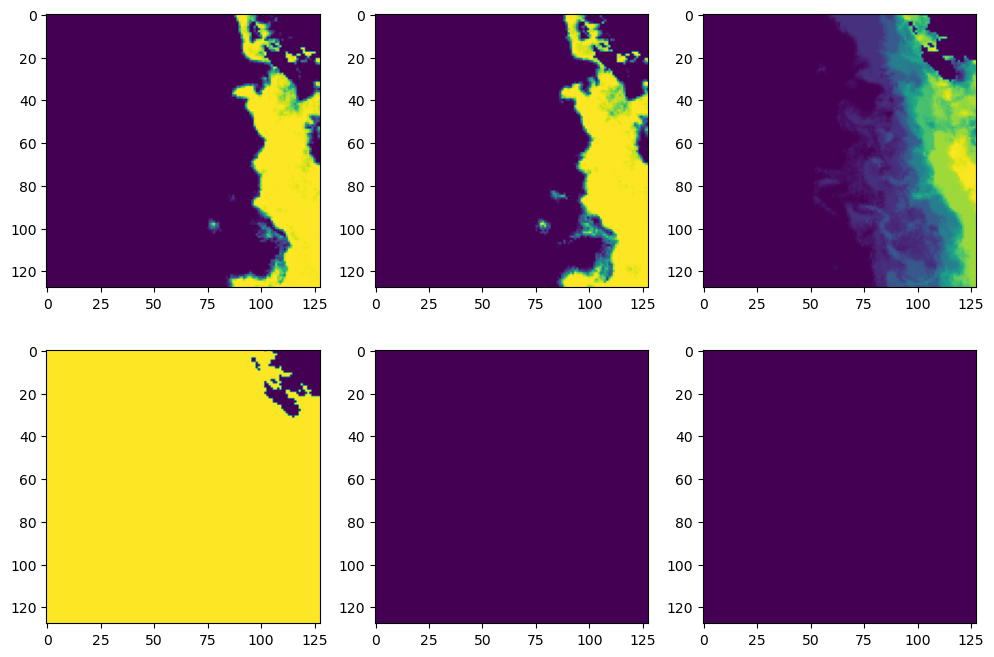

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.ravel()
for i in range(6):
    ax[i].imshow(x[0, i])
plt.show()

## 3. Compute Dataset Statistics

Following https://kozodoi.me/blog/20210308/compute-image-stats

In [28]:
from tqdm import tqdm
path = "/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera/"
files = sorted(os.listdir(path))

psum = np.zeros((7,))  # 7 channels
psum_sq = np.zeros((7,))  # 7 channels

for f in tqdm(files):
    sample = np.load(os.path.join(path, f))
    sample = np.nan_to_num(sample)
    psum += sample.sum(axis=(1, 2))  # sum over pixel axes
    psum_sq += (sample**2).sum(axis=(1, 2))  # sum over pixel axes

# pixel count
count = len(files) * 128 * 128

# mean and std
total_mean = psum / count
total_var = (psum_sq / count) - (total_mean**2)
total_std = np.sqrt(total_var)

# output
pd.DataFrame()
print("mean: " + str(total_mean))
print("std:  " + str(total_std))

  0%|          | 0/3769 [00:00<?, ?it/s]

100%|██████████| 3769/3769 [01:07<00:00, 55.78it/s] 

mean: [ 0.22642351  0.22648079  0.22653938  0.24429476  0.96777467  0.02672248
 -0.0059308 ]
std:  [0.39268343 0.39274583 0.39275978 0.34461111 0.17659802 0.71103528
 0.70262335]


In [37]:
import pandas as pd
df = pd.DataFrame((total_mean, total_std)).T
df.columns = ["Mean", "Std"]
df.index = ["ice_t", "ice_t_1", "ice_t_2", "clim", "land", "cos", "sin"]
df

,Mean,Std
ice_t,0.226424,0.392683
ice_t_1,0.226481,0.392746
ice_t_2,0.226539,0.392760
clim,0.244295,0.344611
land,0.967775,0.176598
cos,0.026722,0.711035
sin,-0.005931,0.702623


In [50]:
df.to_csv("/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera_stats.csv")

In [57]:
from torchvision.transforms import Normalize
class DatasetAMSR(Dataset):
    def __init__(self,
                 path: str,
                 start: str,
                 end: str,
                 normalise: bool = True
                ):
        files = sorted(os.listdir(path))
        start_idx = files.index(f"{start}.npy")
        end_idx = files.index(f"{end}.npy")
        self._path = path
        self._files = files[start_idx:end_idx]
        self._start = start
        self._end = end
        self._stats = pd.read_csv("/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera_stats.csv")
        self._xmean = self._stats["Mean"][1:].values
        self._xstd = self._stats["Std"][1:].values
        # self._xnorm = Normalize(self._xmean, self._xstd)
        self._xnorm = Normalize([0.5], [0.5])
        self._ymean = self._stats["Mean"][[0]].values
        self._ystd = self._stats["Mean"][[0]].values
        # self._ynorm = Normalize(self._ymean, self._ystd)
        self._ynorm = Normalize([0.5], [0.5])
        self._normalise = normalise
    
    def __len__(self):
        return len(self._files)
    
    def __getitem__(self, idx):
        file = self._files[idx]
        sample = np.load(os.path.join(self._path, file))
        # note from dataset creation sample = np.array([ice_t, ice_t_1, ice_t_2, clim, land, cos, sin])
        x = sample[1:]  # hence x is [ice_t_1, ice_t_2, clim, land, cos, sin]
        y = sample[[0]]  # hence y is [ice_t] (keep first dim for downstream convenience)
        mask = sample[[4]]  # hence mask is [land] (keep first dim for downstream convenience)
        date = file[:-4]
        x, y, mask = torch.from_numpy(x).to(torch.float), torch.from_numpy(y).to(torch.float), torch.from_numpy(mask).to(torch.float)
        x, y, mask = torch.nan_to_num(x), torch.nan_to_num(y), torch.nan_to_num(mask)  # set nan to 0, reconsider later
        if self._normalise:
            x = self._xnorm(x)
            y = self._ynorm(y)
        return x, y, mask, date

In [58]:
train_ds = DatasetAMSR("/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera/", "20190826", "20190827")
x, y, mask, date = train_ds[0]
x

tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000,  1.0000,  0.9686]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ...,  0.9919,  0.9848,  0.9829],
         [-1.0000, -1.0000, -1.0000,  ...,  0.9854,  0.9672,  0.9845],
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000,  0.9960,  1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1